In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

In [2]:
df = pd.read_csv('Friebay_team_data.csv')

Text(0.5, 1.0, 'Correlation Heatmap')

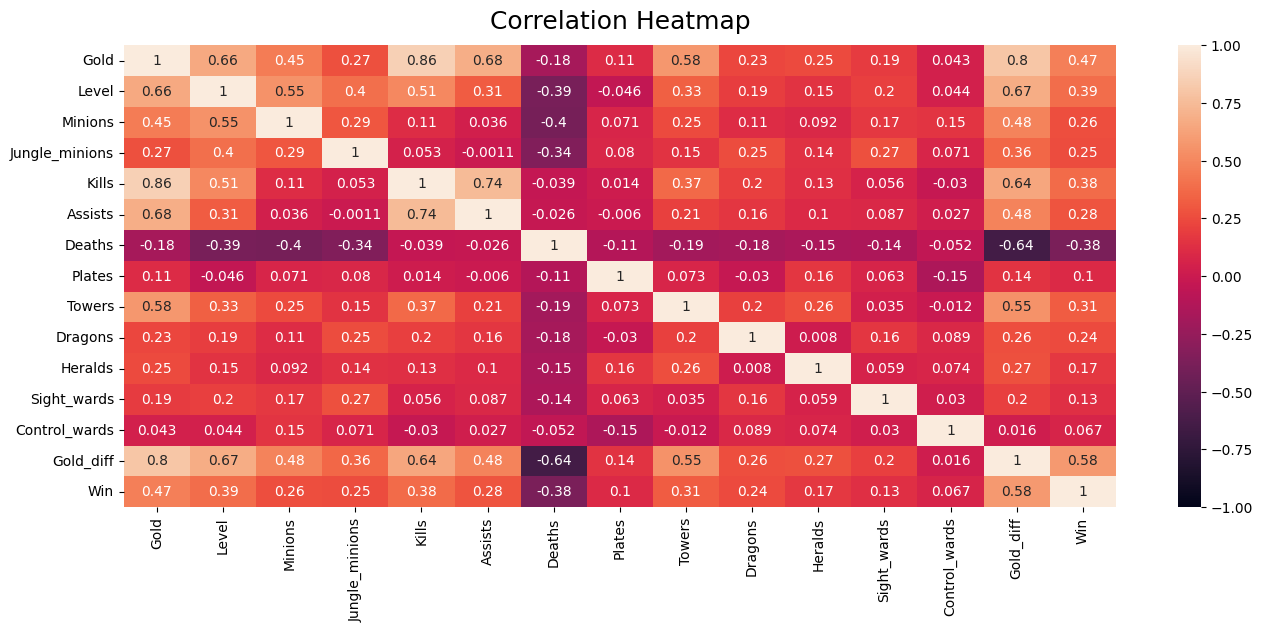

In [3]:
#Generate correlation matrix in orther to see most important values
corr = df.corr()
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

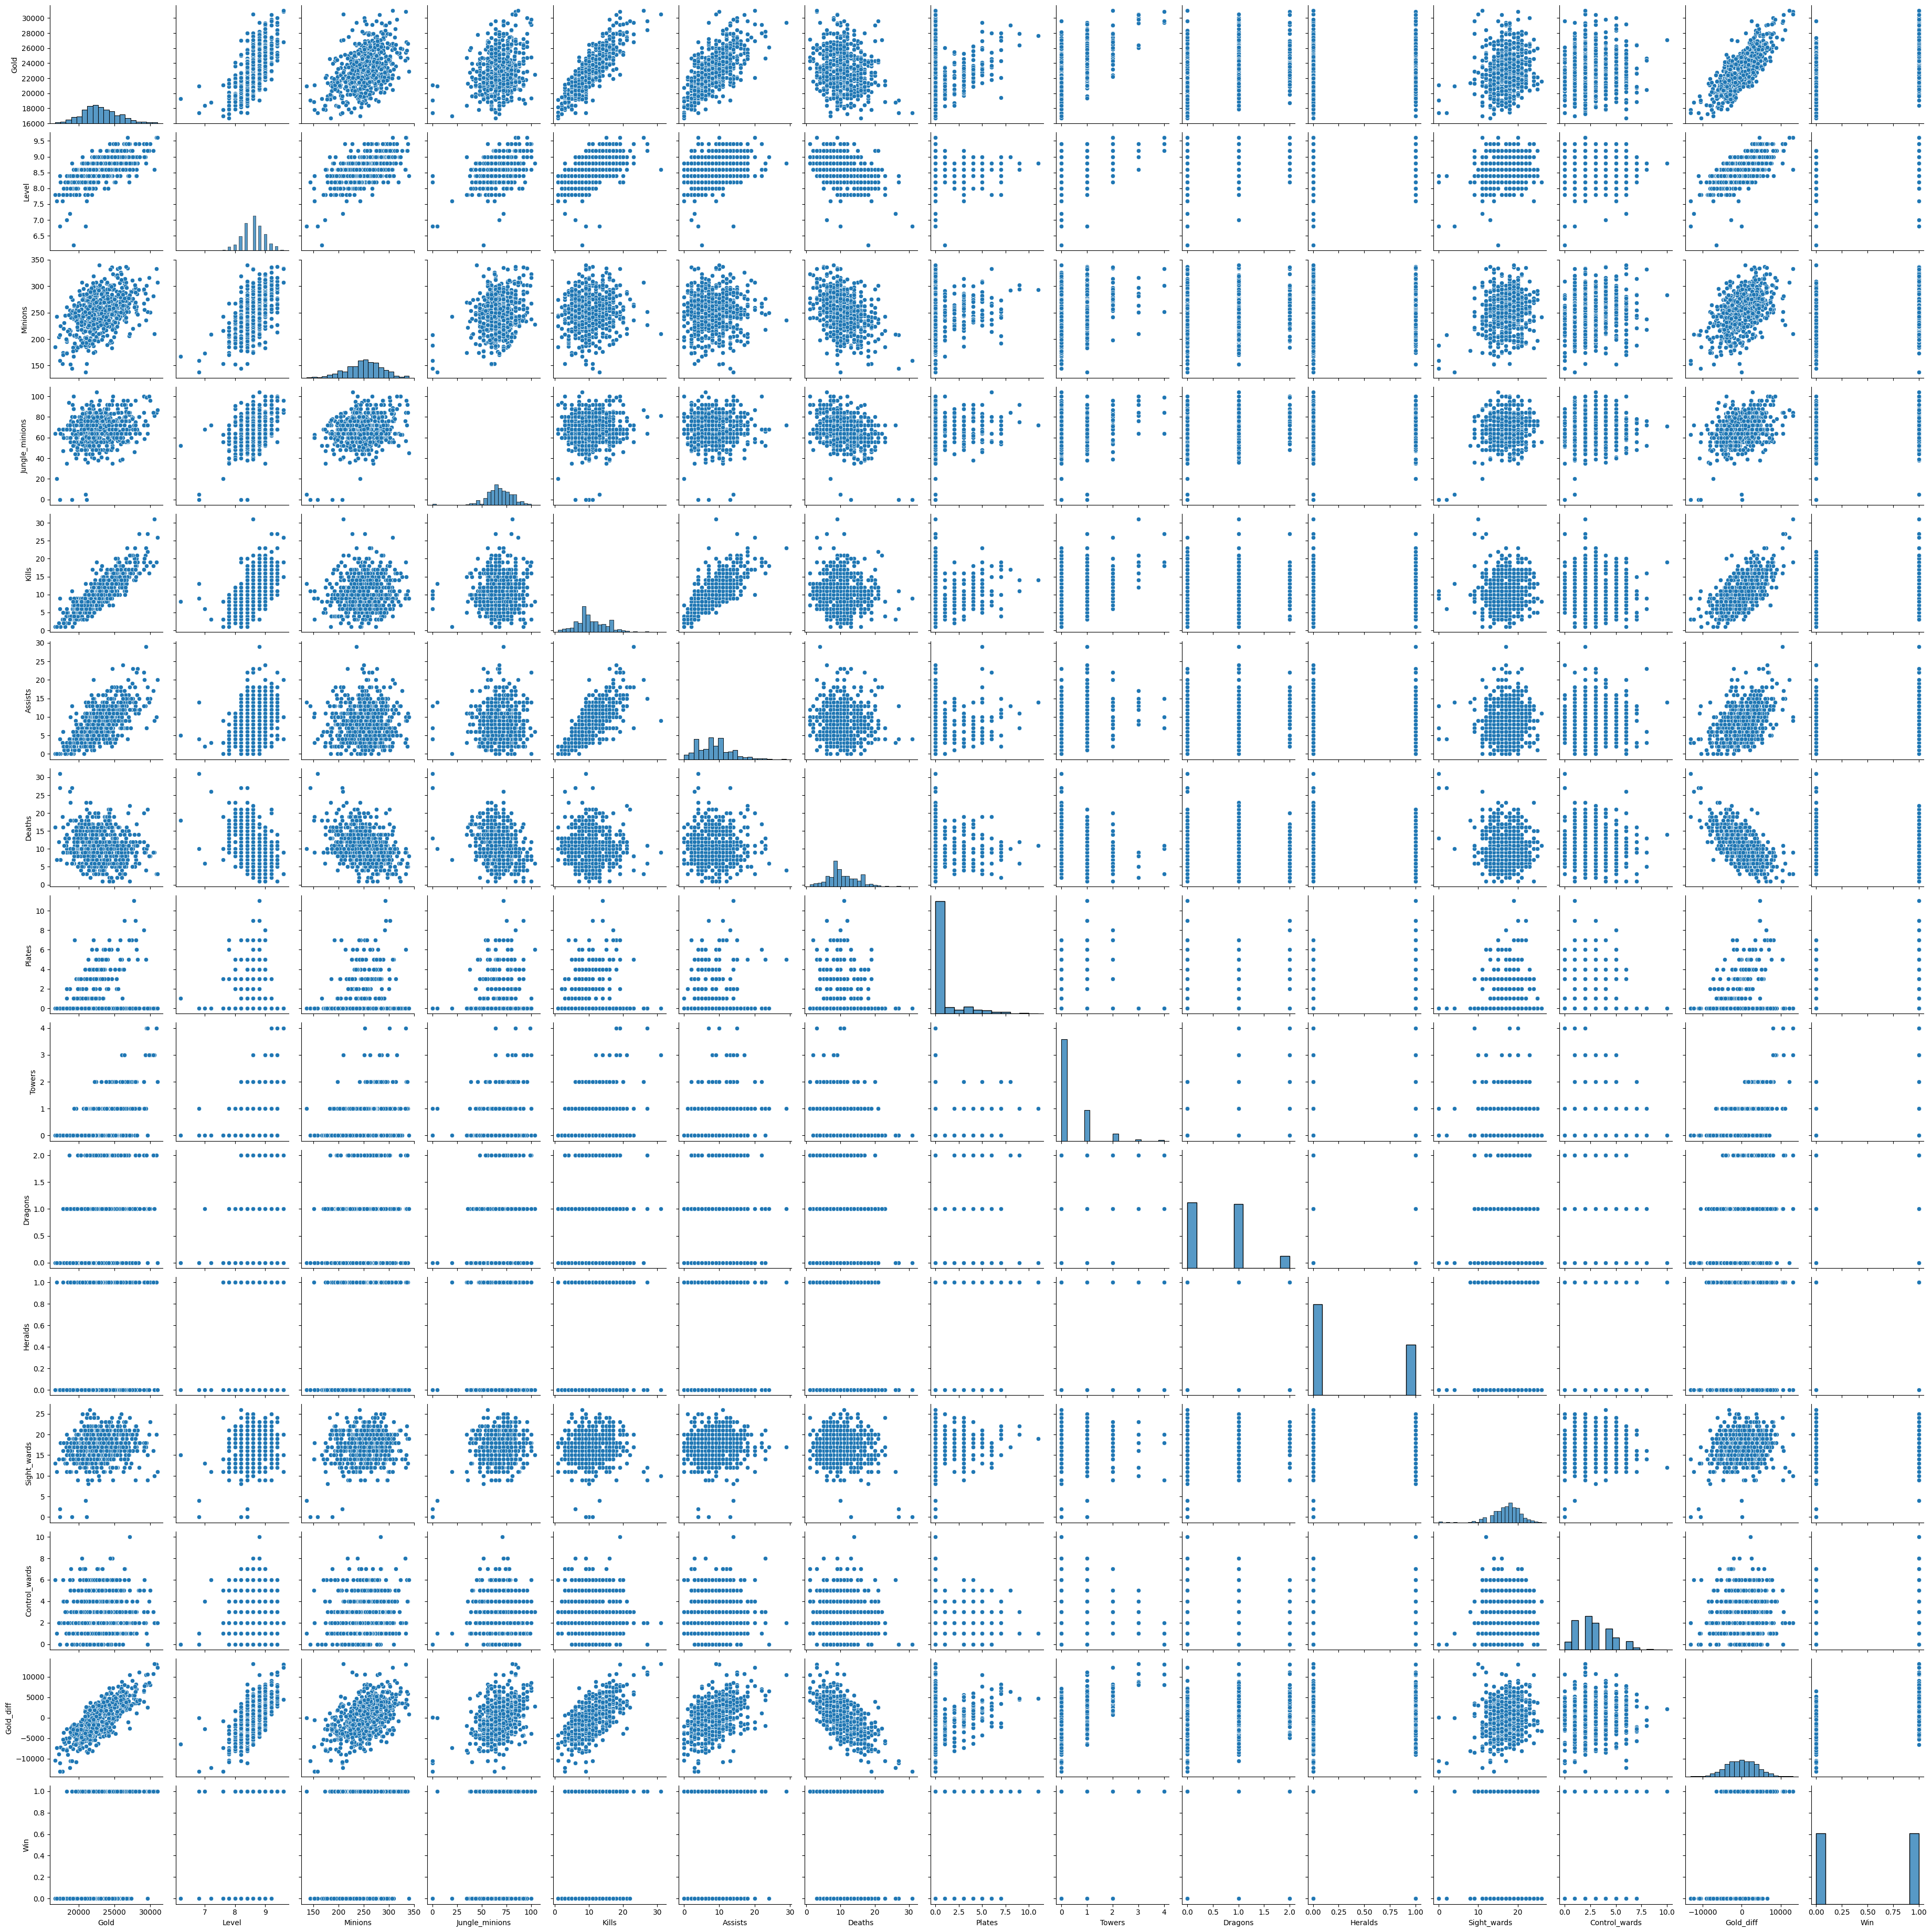

In [13]:
sns.pairplot(df)
plt.show()

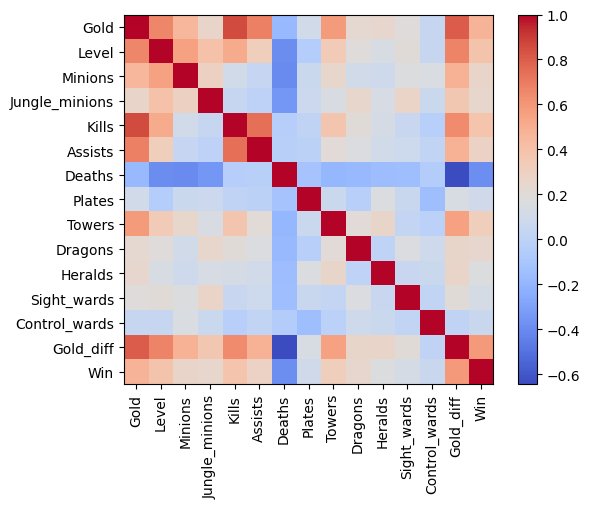

In [14]:
corr_matrix = df.corr()
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()

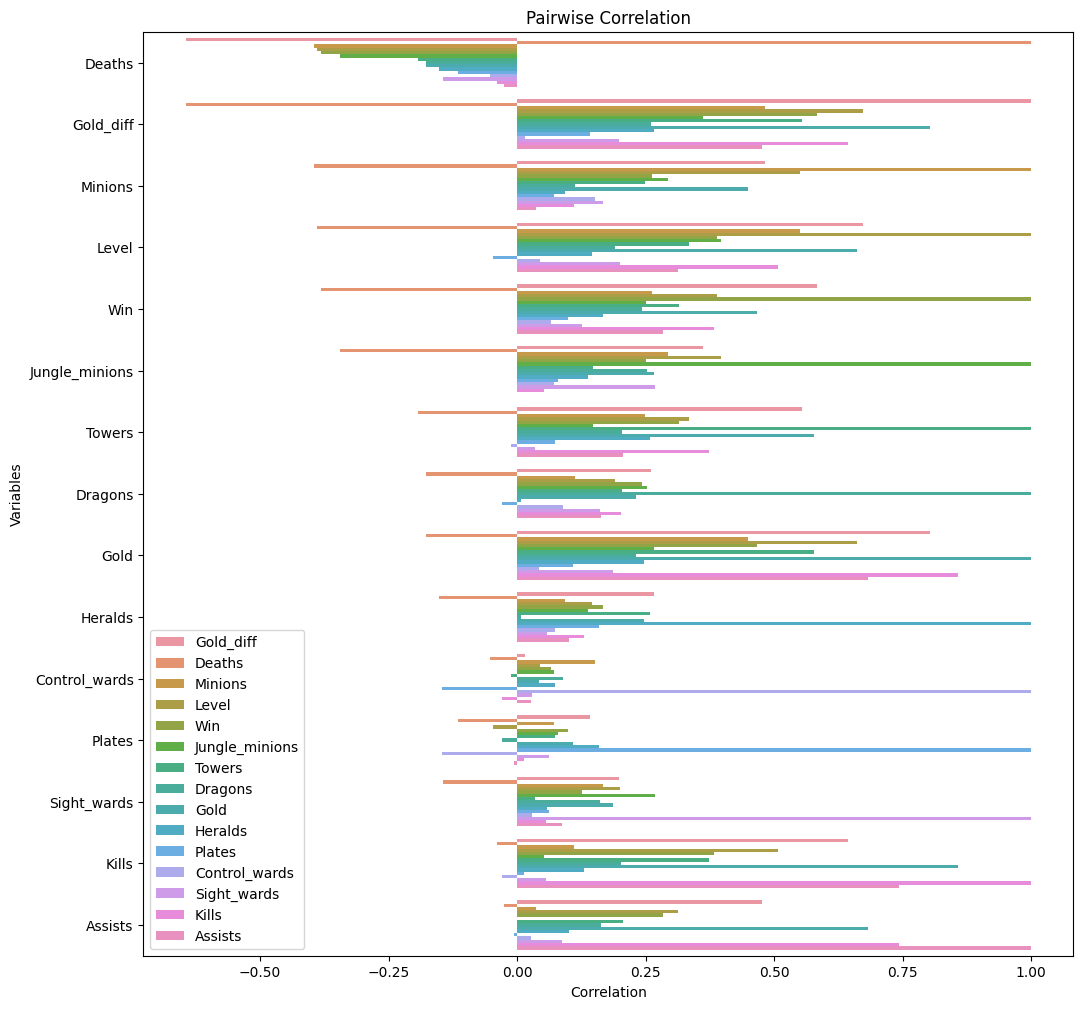

In [19]:
plt.figure(figsize=(12, 12))
sns.barplot(data=df.corr().unstack().sort_values().reset_index(), x=0, y='level_0', hue='level_1', orient='h')
plt.xlabel('Correlation')
plt.ylabel('Variables')
plt.title('Pairwise Correlation')
plt.legend()
plt.show()

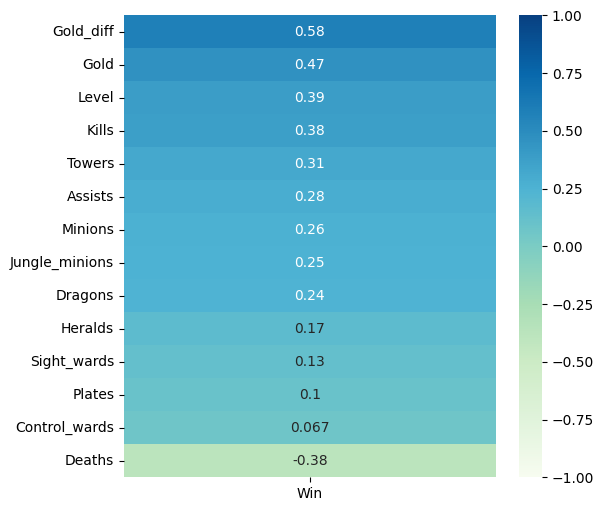

In [4]:
#Generate correlation matrix only of win column
fig, ax = plt.subplots(figsize=((6, 6)))
sns.heatmap(corr["Win"].sort_values(ascending=False).drop("Win").to_frame(), vmin=-1, vmax=1, annot=True,cmap="GnBu")
plt.show()

In [5]:
def evaluate_model(model, X_train, y_train, X_test, y_test, digits=4, figsize=(10,5), params=False):
    # Get Predictions
    y_hat_test = model.predict(X_test)
    y_hat_train = model.predict(X_train)

    # Classification Report / Scores
    print("****CLASSIFICATION REPORT - TRAINING DATA****")
    print(classification_report(y_train, y_hat_train, digits=digits))

    print("****CLASSIFICATION REPORT - TEST DATA****")
    print(classification_report(y_test, y_hat_test, digits=digits))

    print("****CONFUSION MATRIX****")
    fig, axes = plt.subplots(ncols=1, figsize=figsize)

    # Confusion Matrix
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize='true', cmap='Purples', ax=axes)
    disp.ax_.set_title('Confusion Matrix')

    if params == True:
        print("****MODEL PARAMETERS****")
        params = pd.DataFrame(pd.Series(model.get_params()))
        params.columns=['parameters']
        display(params)

def fit_eval(model, X_train, y_train, X_test, y_test, digits=4, figsize=(10,5), params=False):
    model.fit(X_train, y_train)

    evaluate_model(model, X_train, y_train, X_test, y_test, digits=digits, figsize=figsize, params=params)

    return model


In [6]:
#We will first set the complete DataFrames
x_keep_original = ['Level', 'Minions', 'Jungle_minions', 'Kills', 'Assists', 'Deaths', 'Plates', 'Towers', 'Dragons', 'Heralds', 'Sight_wards', 'Control_wards', 'Gold_diff']
X_original = df[x_keep_original]
y_original = df["Win"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_original, y_original, test_size=0.333, random_state=42)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7688    0.7688    0.7688       199
           1     0.7860    0.7860    0.7860       215

    accuracy                         0.7778       414
   macro avg     0.7774    0.7774    0.7774       414
weighted avg     0.7778    0.7778    0.7778       414

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7476    0.6875    0.7163       112
           1     0.6667    0.7292    0.6965        96

    accuracy                         0.7067       208
   macro avg     0.7071    0.7083    0.7064       208
weighted avg     0.7102    0.7067    0.7072       208

****CONFUSION MATRIX****


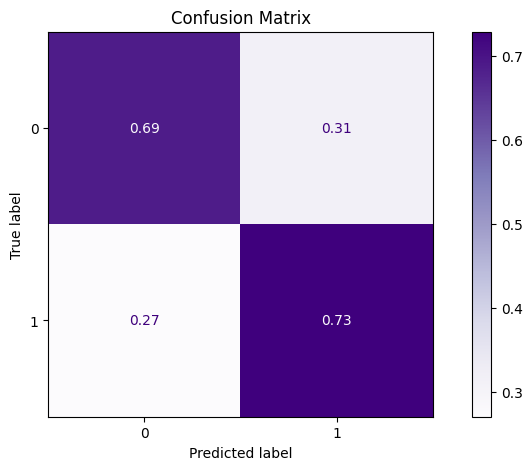

In [27]:
#Logistic regression using the original df
log_select = fit_eval(LogisticRegression(max_iter=1000), X_train, y_train, X_test, y_test)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       199
           1     1.0000    1.0000    1.0000       215

    accuracy                         1.0000       414
   macro avg     1.0000    1.0000    1.0000       414
weighted avg     1.0000    1.0000    1.0000       414

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7129    0.6429    0.6761       112
           1     0.6262    0.6979    0.6601        96

    accuracy                         0.6683       208
   macro avg     0.6695    0.6704    0.6681       208
weighted avg     0.6729    0.6683    0.6687       208

****CONFUSION MATRIX****


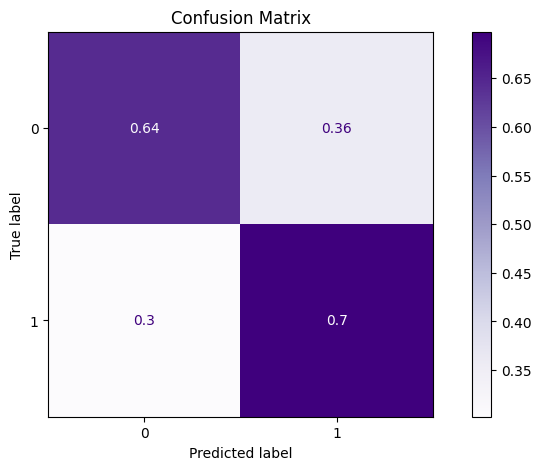

In [26]:
#Decision Tree using the original df
log_select = fit_eval(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       199
           1     1.0000    1.0000    1.0000       215

    accuracy                         1.0000       414
   macro avg     1.0000    1.0000    1.0000       414
weighted avg     1.0000    1.0000    1.0000       414

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7526    0.6518    0.6986       112
           1     0.6486    0.7500    0.6957        96

    accuracy                         0.6971       208
   macro avg     0.7006    0.7009    0.6971       208
weighted avg     0.7046    0.6971    0.6972       208

****CONFUSION MATRIX****


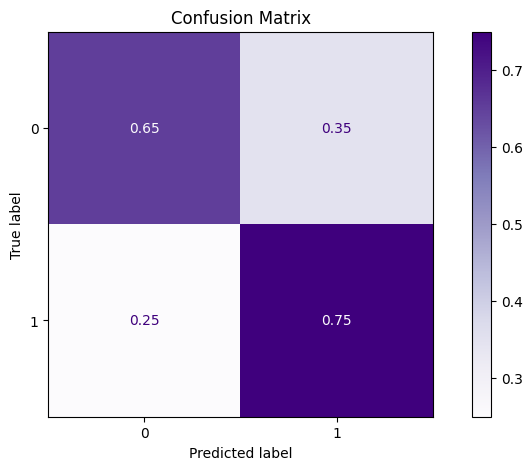

In [25]:
#Random Forest using the original df
log_select = fit_eval(RandomForestClassifier(), X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.75      0.69      0.72       112
           1       0.67      0.73      0.70        96

    accuracy                           0.71       208
   macro avg       0.71      0.71      0.71       208
weighted avg       0.71      0.71      0.71       208



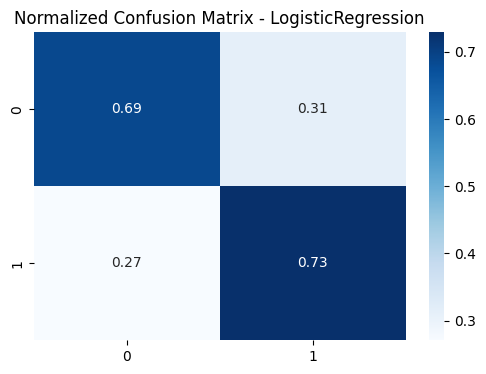

              precision    recall  f1-score   support

           0       0.71      0.66      0.69       112
           1       0.63      0.69      0.66        96

    accuracy                           0.67       208
   macro avg       0.67      0.67      0.67       208
weighted avg       0.68      0.67      0.67       208



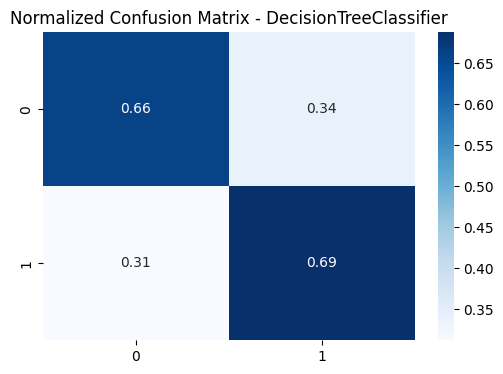

              precision    recall  f1-score   support

           0       0.78      0.65      0.71       112
           1       0.66      0.78      0.71        96

    accuracy                           0.71       208
   macro avg       0.72      0.72      0.71       208
weighted avg       0.72      0.71      0.71       208



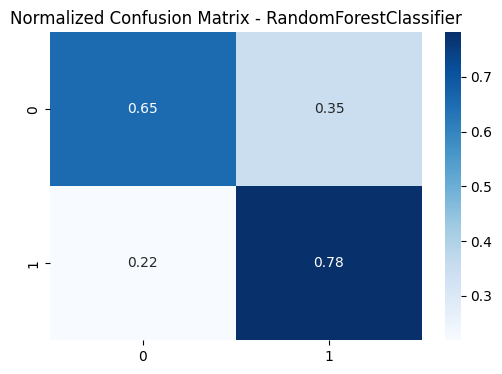

              precision    recall  f1-score   support

           0       0.74      0.62      0.67       112
           1       0.63      0.75      0.68        96

    accuracy                           0.68       208
   macro avg       0.68      0.68      0.68       208
weighted avg       0.69      0.68      0.68       208



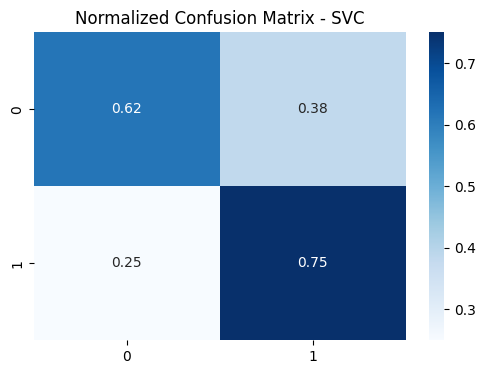

              precision    recall  f1-score   support

           0       0.74      0.67      0.70       112
           1       0.65      0.72      0.68        96

    accuracy                           0.69       208
   macro avg       0.69      0.69      0.69       208
weighted avg       0.70      0.69      0.69       208



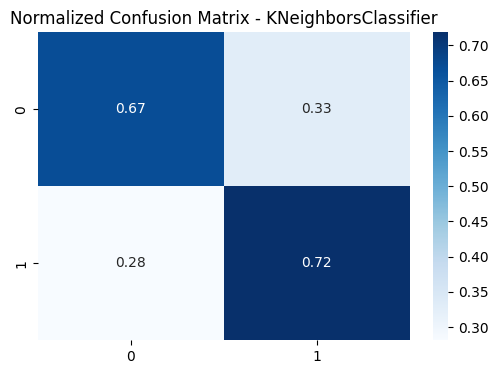

              precision    recall  f1-score   support

           0       0.75      0.74      0.75       112
           1       0.70      0.72      0.71        96

    accuracy                           0.73       208
   macro avg       0.73      0.73      0.73       208
weighted avg       0.73      0.73      0.73       208



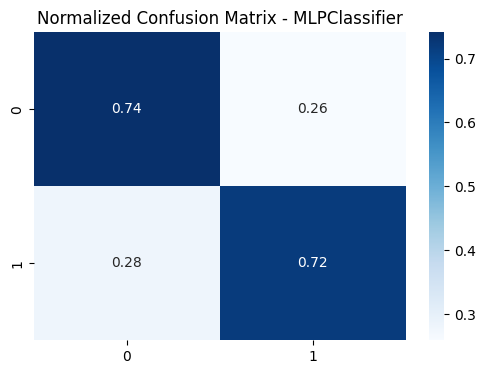

              precision    recall  f1-score   support

           0       0.74      0.71      0.73       112
           1       0.68      0.71      0.69        96

    accuracy                           0.71       208
   macro avg       0.71      0.71      0.71       208
weighted avg       0.71      0.71      0.71       208



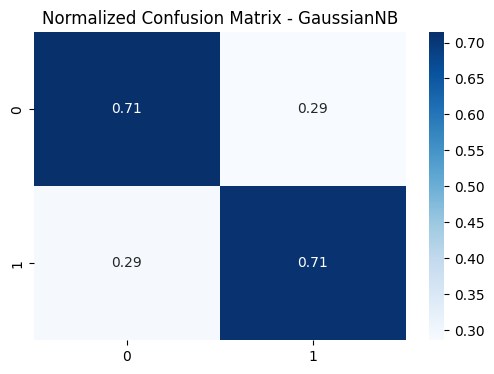

In [48]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Print classification report
    print(classification_report(y_test, predictions))

    # Compute confusion matrix
    confusion_matrix_data = confusion_matrix(y_test, predictions)

    # Normalize confusion matrix
    normalized_confusion_matrix = confusion_matrix_data.astype('float') / confusion_matrix_data.sum(axis=1)[:, np.newaxis]

    # Plot normalized confusion matrix as heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(normalized_confusion_matrix, annot=True, cmap='Blues', fmt='.2f')
    plt.title(f"Normalized Confusion Matrix - {type(model).__name__}")
    plt.show()

# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
evaluate_model(logistic_model, X_train, y_train, X_test, y_test)

# Decision Tree
decision_tree_model = DecisionTreeClassifier()
evaluate_model(decision_tree_model, X_train, y_train, X_test, y_test)

# Random Forest
random_forest_model = RandomForestClassifier()
evaluate_model(random_forest_model, X_train, y_train, X_test, y_test)

# Support Vector Machines (SVM)
svm_model = SVC()
evaluate_model(svm_model, X_train, y_train, X_test, y_test)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
evaluate_model(knn_model, X_train, y_train, X_test, y_test)

# Neural Networks
neural_network_model = MLPClassifier()
evaluate_model(neural_network_model, X_train, y_train, X_test, y_test)

# Naive Bayes
naive_bayes_model = GaussianNB()
evaluate_model(naive_bayes_model, X_train, y_train, X_test, y_test)
